Bitcoin data are extracted from coinmarketcap

In [19]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np


bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# if Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-03-03,11101.9,11528.2,11002.4,11489.7,6690570000,187581000000
1,2018-03-02,10977.4,11189.0,10850.1,11086.4,7620590000,185456000000
2,2018-03-01,10385.0,11052.3,10352.7,10951.0,7317280000,175427000000
3,2018-02-28,10687.2,11089.8,10393.1,10397.9,6936190000,180510000000
4,2018-02-27,10393.9,10878.5,10246.1,10725.6,6966180000,175536000000


Ethereum data

In [2]:
eth_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info['Date']))
eth_market_info.head()



,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-03-03,856.71,868.45,855.21,857.23,1699370000,83911700000
1,2018-03-02,871.76,876.38,852.42,856.85,1894420000,85368100000
2,2018-03-01,856.01,880.30,851.92,872.20,1868520000,83808200000
3,2018-02-28,877.93,890.11,855.12,855.20,1963980000,85936400000
4,2018-02-27,870.37,896.26,867.10,878.26,2053980000,85177800000


Plot data

In [3]:
bitcoin_market_info.columns =[bitcoin_market_info.columns[0]]+['bt_'+i for i in bitcoin_market_info.columns[1:]]
eth_market_info.columns =[eth_market_info.columns[0]]+['eth_'+i for i in eth_market_info.columns[1:]]

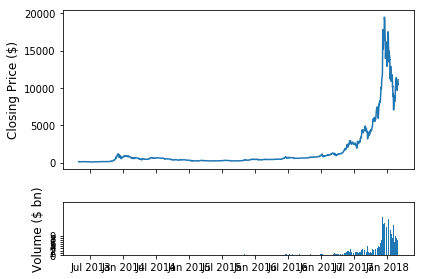

In [4]:


fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['bt_Open'])
ax2.bar(bitcoin_market_info['Date'].astype(datetime.datetime).values, bitcoin_market_info['bt_Volume'].values)
fig.tight_layout()
plt.show()



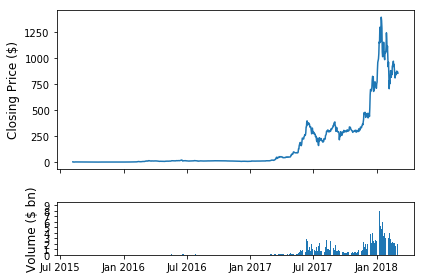

In [5]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(eth_market_info['Date'].astype(datetime.datetime),eth_market_info['eth_Open'])
ax2.bar(eth_market_info['Date'].astype(datetime.datetime).values, eth_market_info['eth_Volume'].values)
fig.tight_layout()
plt.show()

In [6]:
print(bitcoin_market_info.shape)
print(eth_market_info.shape)

(1771, 7)
(940, 7)


We merge both dataset and we only set the data after 2016-01-01.
Each dataset has 7 features. After the merge, we only have 13 features. The main reason why the feature of bitcoin are used to predict the price of ethereum is that the cryptomarket tend to rely on the bitcoin (the first cryptocurrency). When the value of bitcoin goes down, other crytocurrencies tend to go down.
This is mainly due to the pair system that exist in the cryptomarket. (btc/xmr, btc/eth ...)

In [7]:
market_info = pd.merge(bitcoin_market_info,eth_market_info, on=['Date'])
print(market_info.shape)
market_info = market_info[market_info['Date']>='2016-01-01']
print(market_info.shape)
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
    market_info = market_info.assign(**kwargs)
market_info.head()

(940, 13)
(793, 13)


,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap,eth_Open,eth_High,eth_Low,eth_Close,eth_Volume,eth_Market Cap,bt_day_diff,eth_day_diff
0,2018-03-03,11101.9,11528.2,11002.4,11489.7,6690570000,187581000000,856.71,868.45,855.21,857.23,1699370000,83911700000,0.034931,0.000607
1,2018-03-02,10977.4,11189.0,10850.1,11086.4,7620590000,185456000000,871.76,876.38,852.42,856.85,1894420000,85368100000,0.009929,-0.017103
2,2018-03-01,10385.0,11052.3,10352.7,10951.0,7317280000,175427000000,856.01,880.30,851.92,872.20,1868520000,83808200000,0.054502,0.018913
3,2018-02-28,10687.2,11089.8,10393.1,10397.9,6936190000,180510000000,877.93,890.11,855.12,855.20,1963980000,85936400000,-0.027070,-0.025890
4,2018-02-27,10393.9,10878.5,10246.1,10725.6,6966180000,175536000000,870.37,896.26,867.10,878.26,2053980000,85177800000,0.031913,0.009065


We split the dataset between training set and test set

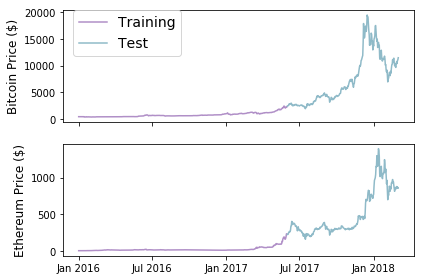

In [8]:
split_date = '2017-06-01'
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['bt_Close'], 
         color='#B08FC7', label='Training')
ax1.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['bt_Close'], 
         color='#8FBAC8', label='Test')
ax2.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['eth_Close'], 
         color='#B08FC7')
ax2.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['eth_Close'], color='#8FBAC8')
ax1.set_xticklabels('')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
plt.tight_layout()
ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

Add feature in dataset. The goal is to replace some column ( open price, daily highs and lows) and reformulate these information.


**The close_off_high** represents the gap between the closing price and price high for that day, where values of -1 and 1 mean the closing price was equal to the daily low or daily high, respectively.

**The volatility** columns are simply the difference between high and low price divided by the opening price.

In [9]:
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1,
            coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open'])}
    market_info = market_info.assign(**kwargs)

In [10]:
model_data = market_info[['Date']+[coin+metric for coin in ['bt_', 'eth_'] 
                                   for metric in ['Close','Volume','close_off_high','volatility']]]
# need to reverse the data frame so that subsequent rows represent later timepoints
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
792,2016-01-01,434.33,36278900,-0.560641,0.020292,0.948024,206062,-0.418477,0.025040
791,2016-01-02,433.44,30096600,0.250597,0.009641,0.937124,255504,0.965898,0.034913
790,2016-01-03,430.01,39633800,-0.173865,0.020827,0.971905,407632,-0.317885,0.060792
789,2016-01-04,433.09,38477500,-0.474265,0.012649,0.954480,346245,-0.057657,0.047943
788,2016-01-05,431.96,34522600,-0.013333,0.010391,0.950176,219833,0.697930,0.025236


- We split the data set
- We will train a recurent network (RNN), so we can drop the date (the feature)

In [11]:
# we don't need the date columns anymore
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

We define a window of several days (5 days). It basically means that we input the data by chuck of 5 days.

In addition, we normalize some columns in order to ease our RNN convergence.

Finally, we store our dataset in numpy array


In [12]:
window_len = 5
norm_cols = [coin+metric for coin in ['bt_', 'eth_'] for metric in ['Close','Volume']]
# training set
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1

#test set
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['eth_Close'][window_len:].values/test_set['eth_Close'][:-window_len].values)-1

LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

The LSTM_training_inputs is a list and each element is a (10,8) matrix. 8 feature, 10 days

In [13]:
print(training_set.shape)
print(LSTM_training_inputs.shape)

print(test_set.shape)
print(LSTM_test_inputs[0].shape)

(517, 8)
(512, 5, 8)
(276, 8)
(5, 8)


In [14]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(256, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

Using TensorFlow backend.


In [15]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# model output is next price normalised to 10th previous closing price
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1
# train model on data
# note: eth_history contains information on the training error per epoch
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
6s - loss: 0.1118
Epoch 2/50
5s - loss: 0.0798
Epoch 3/50
5s - loss: 0.0725
Epoch 4/50
5s - loss: 0.0694
Epoch 5/50
5s - loss: 0.0712
Epoch 6/50
5s - loss: 0.0667
Epoch 7/50
5s - loss: 0.0664
Epoch 8/50
5s - loss: 0.0660
Epoch 9/50
5s - loss: 0.0654
Epoch 10/50
5s - loss: 0.0653
Epoch 11/50
5s - loss: 0.0626
Epoch 12/50
5s - loss: 0.0607
Epoch 13/50
5s - loss: 0.0648
Epoch 14/50
5s - loss: 0.0644
Epoch 15/50
5s - loss: 0.0644
Epoch 16/50
5s - loss: 0.0614
Epoch 17/50
5s - loss: 0.0605
Epoch 18/50
5s - loss: 0.0616
Epoch 19/50
5s - loss: 0.0641
Epoch 20/50
5s - loss: 0.0634
Epoch 21/50
5s - loss: 0.0592
Epoch 22/50
5s - loss: 0.0597
Epoch 23/50
5s - loss: 0.0619
Epoch 24/50
5s - loss: 0.0628
Epoch 25/50
5s - loss: 0.0601
Epoch 26/50
5s - loss: 0.0593
Epoch 27/50
5s - loss: 0.0592
Epoch 28/50
5s - loss: 0.0597
Epoch 29/50
5s - loss: 0.0582
Epoch 30/50
5s - loss: 0.0599
Epoch 31/50
5s - loss: 0.0610
Epoch 32/50
5s - loss: 0.0569
Epoch 33/50
5s - loss: 0.0588
Epoch 34/50
5s - lo

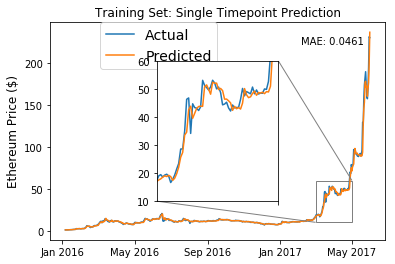

In [16]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_training_inputs))+1)-\
            (training_set['eth_Close'].values[window_len:])/(training_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 3.35, loc=10) # zoom-factor: 3.35, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['eth_Close'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2017, 3, 1), datetime.date(2017, 5, 1)])
axins.set_ylim([10,60])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

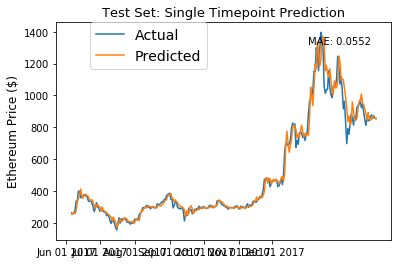

In [17]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_test_inputs))+1) * test_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_test_inputs))+1)-\
            (test_set['eth_Close'].values[window_len:])/(test_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

Conclusion: 

Our LSTM model seems to have performed reasonably on the unseen test set. However it fail to predict a sudden value drop. This can be explained by the fact that our model is based on purely mathematical/logical data (volatily ...), but it doesn't take into account the **parameter** (this market is highty speculative). In order to improve our model, we should create a model which also includes the sentiment of people (for expample: sentiment detection on facebook or twitter)